*This will be updated on a monthly basis*

# US COVID-19 BREAKDOWN, ANALYSIS, PREDICTIONS AND REPRECUSSIONS
*Humberto Basurto-Villa 03-21-2020*

![Panic](img/Panic.jpg)

## People all around the world are getting sick. Businesses are closing. People are being quarantined. TP is nowhere to be found. 

### It seems like the end of the world to many but is it really?
According to The Centers for Disease Control and Prevention
 Human coronaviruses were first identified in the mid-1960s (*https://www.cdc.gov/coronavirus/types.html*, February 15, 2020). You might have even noticed some old cleaning supplies specifying that they protect against "Coronavirus".
 
As opposed to being named after a popular beverage coronaviruses are actually named for the crown-like spikes on their surface. There are four main sub-groupings of coronaviruses, known as alpha, beta, gamma, and delta. There are seven types of coronaviruses that can infect people and they are:
1. 229E (alpha coronavirus)
2. NL63 (alpha coronavirus)
3. OC43 (beta coronavirus)
4. HKU1 (beta coronavirus)
5. MERS-CoV (the beta coronavirus that causes Middle East Respiratory Syndrome, or MERS)
6. SARS-CoV (the beta coronavirus that causes severe acute respiratory syndrome, or SARS)
7. __SARS-CoV-2 (the novel coronavirus that causes coronavirus disease 2019, or COVID-19)__

__COVID-19__ seems to be the latest iteration of the disease, having evolved from only affecting animals to making people sick. The first reported case of COVID-19 was reported in Wuhan, China after Chinese authorities treated dozens of cases of pneumonia from an unknown cause (Bryson Taylor, Derrick  *https://www.nytimes.com/article/coronavirus-timeline.html*, March 19, 2020). Chinese DR Li Wenliang, now deceased, was the first to warn others of the Sars-like illness. He was silenced by authorities and the disease spread quickly from there.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import seaborn as sns
from IPython.display import HTML
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# Python variable viewing settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Loading Dataset to Variable
CGW0320=pd.read_csv('CovidGeoWorldwide.csv')

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View Analysis Code"></form>''')

Using data provided by the European Centre for Disease Prevention and Control *(https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)* we can take a look at some of the data from all over the world here are some snippets of their dataset:

In [2]:
CGW0320.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,3/20/2020,20,3,2020,0,0,Afghanistan,AF
1,3/19/2020,19,3,2020,0,0,Afghanistan,AF
2,3/18/2020,18,3,2020,1,0,Afghanistan,AF
3,3/17/2020,17,3,2020,5,0,Afghanistan,AF
4,3/16/2020,16,3,2020,6,0,Afghanistan,AF


In [3]:
CGW0320.tail()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
5836,1/2/2020,2,1,2020,0,0,Vietnam,VN
5837,1/1/2020,1,1,2020,0,0,Vietnam,VN
5838,12/31/2019,31,12,2019,0,0,Vietnam,VN
5839,3/20/2020,20,3,2020,0,0,Zambia,ZM
5840,3/19/2020,19,3,2020,2,0,Zambia,ZM


Here is some information about the data:

In [4]:
CGW0320.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5841 entries, 0 to 5840
Data columns (total 8 columns):
DateRep                      5841 non-null object
Day                          5841 non-null int64
Month                        5841 non-null int64
Year                         5841 non-null int64
Cases                        5841 non-null int64
Deaths                       5841 non-null int64
Countries and territories    5841 non-null object
GeoId                        5835 non-null object
dtypes: int64(5), object(3)
memory usage: 365.1+ KB


We can gather some data from just looking at two snippets of the data.

1. There seems to have dates in two formats 
2. The data provides updated information on the amount of cases as well as the amount of deaths
3. Countries and territories also have a Geographical ID assigned<br>

Some of the information is redundant and other is not important to what we want to see which is the number of Cases and Deaths for any given Country/Territory.

In [5]:
#Dropping unecessary columns
CGW0320=CGW0320.drop([
    'Day','Month','Year'
],axis=1)

In [6]:
#Setting column to datetime object
CGW0320['DateRep']=pd.to_datetime(CGW0320['DateRep'])

In [7]:
#Finding China data
CGW0320CHINA=CGW0320.where(CGW0320['Countries and territories']=='China')

In [8]:
#Getting rid of the NaN values
CGW0320CHINA=CGW0320CHINA.dropna()

In [9]:
#Dropping unecessary Columns
CGW0320CHINA=CGW0320CHINA.drop(['Countries and territories', 'GeoId'], axis=1)

Here you can see a new dataset derived form the initial parent dataset. In this one I have isolated all of the information it had on on __China__ including the __Dates__ denoted by "DateRep" the __Cases__ and __Deaths__

In [10]:
#Setting index
CGW0320CHINA.index=CGW0320CHINA['DateRep']

In [11]:
#Dropping obsolete column
CGW0320CHINA=CGW0320CHINA.drop(['DateRep'],axis=1)

In [12]:
CGW0320CHINA.head()

,Cases,Deaths
DateRep,,
2020-03-20,99.0,4.0
2020-03-19,75.0,8.0
2020-03-18,33.0,16.0
2020-03-17,110.0,9.0
2020-03-16,25.0,14.0


# COVID-19 in China

![ChinaCovidResponse](img/ChinaCovidResponse.jpeg)

*Suddenly everyone decided it was a good time to travel*

In [13]:
#Preparing Variables for plotting
CHcases=CGW0320CHINA['Cases']
CHdeaths=CGW0320CHINA['Deaths']
CHx=CGW0320CHINA.index

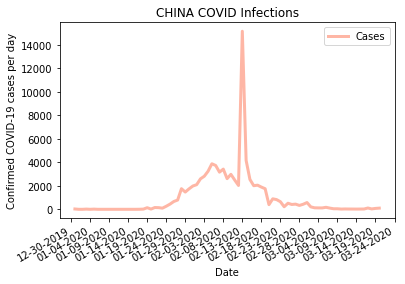

In [14]:
#Plotting the # of cases in China
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(CHx, CHcases, color='#feb6a5', linewidth=3)
ax.set(title="CHINA COVID Infections",
      ylabel='Confirmed COVID-19 cases per day', 
      xlabel='Date')
ax.legend(loc='best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

# Total confirmed cases of COVID-19 in China:81337
## Max cases in a single day:15141

Looks like china was steadily increasing in the number of cases found per day until __2-13-2020__ where it spided to a whopping __15141 cases__. Afterwards the amount of cases per day has been steadily decreasing. One reason for this could be that there is __inaccurate reporting of cases(again)__... or people are just not getting as sick meaning __China has sucessfully put in enough preventative measures that less people are getting infected every day__. 

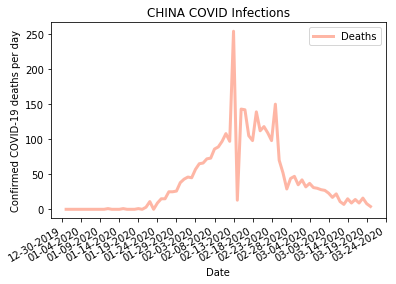

In [15]:
#Plotting the # of deaths in China
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(CHx, CHdeaths, color='#feb6a5', linewidth=3)
ax.set(title="CHINA COVID Infections",
      ylabel='Confirmed COVID-19 deaths per day', 
      xlabel='Date')
ax.legend(loc='best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

# Total confirmed deaths form COVID-19 in China:3254
## Max deaths in a single day:254

As the number daily reported cases in china has been decreasing so has the number of deaths after a spike of __254 deaths__ on __2-13-2020__. This is great news!

# So what exactly did China do to so drastically reduce the spread of COVID-19?
Well, In mid-January, Chinese authorities introduced unprecedented measures to contain the virus, stopping movement in and out of Wuhan, the centre of the epidemic, and 15 other cities in Hubei province — home to more than 60 million people. Flights and trains were suspended, and roads were blocked.

Soon after, people in many Chinese cities were quarantined and told to stay at home and venture out only to get food or medical help. Some 760 million people, roughly half the country’s population, were confined to their homes, according to The New York Times
*(https://www.nytimes.com/2020/02/15/business/china-coronavirus-lockdown.html).*



# Here is are some graphs more acurately portraying the Case to Death ratio

[]

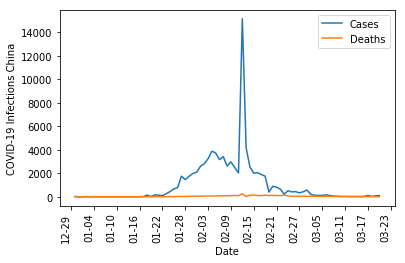

In [16]:
#Plotting Comparisons between infections and deaths
ax=CGW0320CHINA.plot()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()
ax.set_ylabel('COVID-19 Infections China')
ax.set_xlabel('Date')
plt.xticks(rotation=90)
plt.minorticks_off()
plt.plot()

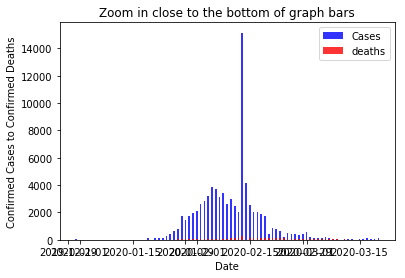

In [17]:
fig, ax=plt.subplots()
index=CHx
barwidth=0.45
opacity=0.8

rects1=plt.bar(index, CHcases, barwidth,
              alpha=opacity,
              color='b',
              label='Cases')
rects2=plt.bar(index,CHdeaths,barwidth,
              alpha=opacity,
              color='r',
              label='deaths')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases to Confirmed Deaths')
plt.title('Zoom in close to the bottom of graph bars')
plt.legend()

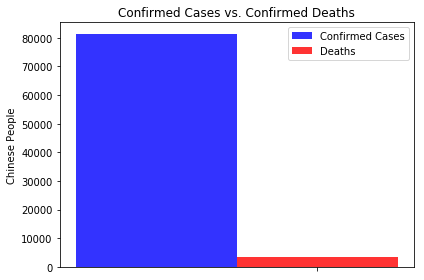

In [18]:
Ngroup=1
CHDeaths=(3254)
CHCases=(81337)
fig, ax = plt.subplots()
index = np.arange(Ngroup)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, CHCases, bar_width,
alpha=opacity,
color='b',
label='Confirmed Cases')

rects2 = plt.bar(index + bar_width, CHDeaths, bar_width,
alpha=opacity,
color='r',
label='Deaths')

plt.xlabel('')
plt.ylabel('Chinese People')
plt.title('Confirmed Cases vs. Confirmed Deaths')
plt.xticks(index + bar_width,'')
plt.legend()

plt.tight_layout()
plt.show()

# Current COVID-19 mortality rate in China: 4%

In [19]:
CGW0320US=CGW0320.where(CGW0320['Countries and territories']=='United_States_of_America')

In [20]:
CGW0320US=CGW0320US.dropna()

In [21]:
CGW0320US=CGW0320US.drop(['Countries and territories', 'GeoId'], axis=1)

In [22]:
CGW0320US.index=CGW0320US['DateRep']

In [23]:
CGW0320US=CGW0320US.drop(['DateRep'], axis=1)

In [24]:
CGW0320US=CGW0320US['3/20/2020':'1/20/2020']

In [25]:
cases=CGW0320US['Cases']
deaths=CGW0320US['Deaths']
x=CGW0320US.index

# COVID-19 in the United States

*At the time of writing the dataset that I was using had the total confirmed cases for the date of 03/20 but it was missing the total amount of confirmed deaths so for some of the graphs I opted to exclude the incomplete data from 03/20*

![USCovidResponse](img/USCovidResponse.jpeg)

Rona, who?

# The first case of COVID-19 in the US

On January 20 the first confirmed case of COVID-19 was reported in the United States. The patient was a 35-year old Washington man who had a 4-day history of cough and subjective fever. After the patient disclosed to his caretakers that he'd been visiting family in Wuhan, China the Washington Department of Health notified the CDC Emergency Operations Center of the situation. The CDC decided he should be tested for 2019-nCoV and the results came back positive *https://www.nejm.org/doi/full/10.1056/NEJMoa2001191*

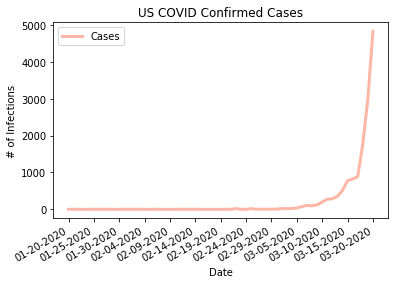

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x, cases, color='#feb6a5', linewidth=3)
ax.set(title="US COVID Confirmed Cases",
      ylabel='# of Infections', 
      xlabel='Date')
ax.legend(loc='best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gcf().autofmt_xdate()
plt.show()
#plt.xticks(rotation=90)
#plt.plot(CGW0302US)
#plt.title('COVID-19 US')
#plt.ylabel('Infected US')
#plt.xLabel('Infected by Day')


# Total confirmed cases: 9415
# Total confirmed cases(03/20 included):14250
# Max confirmed cases:4835

# The American response is a little lackluster...

![Trump Adressess China Questions](img/TrumpChina.png)

*"It's not racist at all, no, not at all. It comes from China, that's why. I want to be accurate. ... I have great love for all of the people from our country, but as you know China tried to say at one point ... that it was caused by American soldiers. That can't happen, it's not gonna happen, not as long as I'm president. It comes from China."*-Donald J. Trump

## Spring Break, Concerts, Restaurants, Parties, and Supermarkets, Americans just can't stay put.

First it starts as the distant problem overseas. Then the problem on the other side of the country. The problem one state over. Finally the problem next door. There were many who shrugged it off as nothing including, some would say, the President himself. People didn't start taking COVID-19 seriously until early March as the confirmed Coronavirus cases in the US seemed to double overnight.

In [27]:
deaths=deaths.drop(deaths.index[0])

<Figure size 80x80 with 0 Axes>

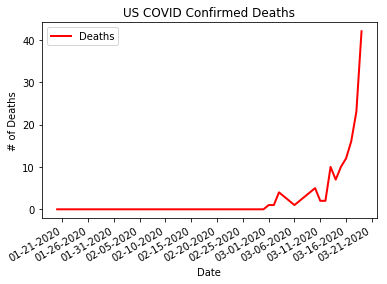

In [28]:
figure(num=None, figsize=(1, 1), dpi=80, facecolor='w', edgecolor='k')
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x.drop(x[0]), deaths,color='red', linewidth=2)
ax.set(title="US COVID Confirmed Deaths",
      ylabel='# of Deaths', 
      xlabel='Date')
ax.legend(loc='best')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gcf().autofmt_xdate()
plt.show()

# Total confirmed deaths form COVID-19 in the US:150
## Max deaths in a single day:42

Suddenly stores are closing, companies are cutting hours and laying people off. Schools are closing, events are being postponed and cancelled. People are flocking to the markets in droves trying to stock up on groceries, essentials and... Toilet Paper? It seems people are finally taking it more seriously but...
# Is the public freakout really warranted?

[]

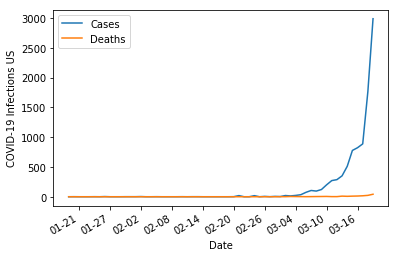

In [29]:
ax=CGW0320US.drop(CGW0320US.index[0]).plot()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()
ax.set_ylabel('COVID-19 Infections US')
ax.set_xlabel('Date')
plt.minorticks_off()
plt.plot()

In [30]:
cases=cases.drop(cases.index[0])

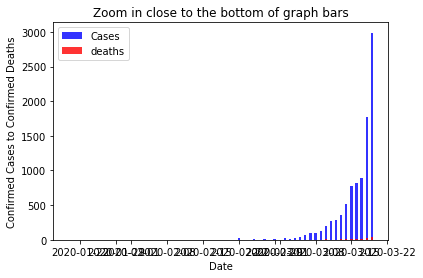

In [31]:
fig, ax=plt.subplots()
index=x.drop(x[0])
barwidth=0.45
opacity=0.8

rects1=plt.bar(index, cases, barwidth,
              alpha=opacity,
              color='b',
              label='Cases')
rects2=plt.bar(index,deaths,barwidth,
              alpha=opacity,
              color='r',
              label='deaths')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases to Confirmed Deaths')
plt.title('Zoom in close to the bottom of graph bars')
plt.legend()

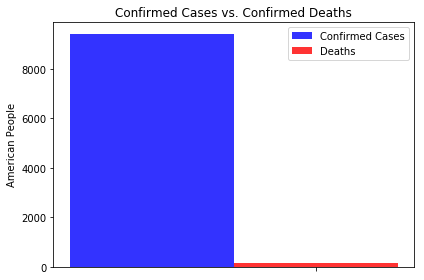

In [32]:
Ngroup=1
USDeaths=(150)
USCases=(9415)
fig, ax = plt.subplots()
index = np.arange(Ngroup)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, USCases, bar_width,
alpha=opacity,
color='b',
label='Confirmed Cases')

rects2 = plt.bar(index + bar_width, USDeaths, bar_width,
alpha=opacity,
color='r',
label='Deaths')

plt.xlabel('')
plt.ylabel('American People')
plt.title('Confirmed Cases vs. Confirmed Deaths')
plt.xticks(index + bar_width,'')
plt.legend()

plt.tight_layout()
plt.show()

# Current COVID-19 mortality rate in United States:1.5%

## Who does COVID-19 primarily affect?

In [33]:
Severity=pd.read_csv('ImperialCollegeSeverity.csv')

In [34]:
Severity

,Age Group,% Symptomatic Requiring hospitalization,% hospitalized cases requiring critical care,Infection Fatality Ratio
0,0 to 9,0.10%,5.00%,0.00%
1,10 to 19,0.30%,5.00%,0.01%
2,20 to 29,1.20%,5.00%,0.03%
3,30 to 39,3.20%,5.00%,0.08%
4,40 to 49,4.90%,6.30%,0.15%
5,50 to 59,10.20%,12.20%,0.60%
6,60 to 69,16.60%,27.40%,2.20%
7,70 to 79,24.30%,43.20%,5.10%
8,80+,27.30%,70.90%,9.30%


*https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf*

The people most negatively affected by this virus are individuals 50+ who's "Symptomatic requiring hospitalization"  and "Hospitalization cases requiring critical care" percentages more than double that of their younger counterparts.

At the the journals time of writing in 03/16 according to Imperial College if no precautions are taken (unlikely and untrue as of now)81% of population is expected to be infected over course of epidemic.
If they compare the effects of epidemic to the us with GB they predict  __the amount of cases could be 510,000 for GB and 2.2 million in US.__

### If we take in account the estimated current population of the United States which is around __327 million__, and apply the london __"worst case scenario"__ in which __81% of the population__ gets affected and apply the current __1% mortality rate__ given the current available data as of (3-20-20), that would be about 

<h1 align="center">2,648,700‬ people dead. <h1>

*(strictly from COVID-19 and assuming the infection and death rate stays the same.)*

![Dead to Living Ratio](img/men.png)
<h1 align="center"> Thats 1 American dead out of every 123.4</h1>

### That's more than __6x__ more people dead from the COVID-19 than from Americans dead during ww2 which is numbered around 405,000+ 
*(https://www.washingtonpost.com/news/politics/wp/2017/08/14/heres-how-many-americans-have-already-died-to-defeat-the-nazis-and-the-confederacy/)*

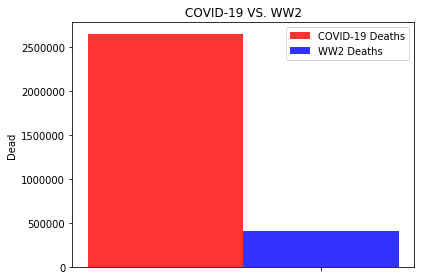

In [35]:
Ngroup=1
DeadFromCovid=(2648700)
WW2=(405000)
fig, ax = plt.subplots()
index = np.arange(Ngroup)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, DeadFromCovid, bar_width,
alpha=opacity,
color='r',
label='COVID-19 Deaths')

rects2 = plt.bar(index + bar_width, WW2, bar_width,
alpha=opacity,
color='B',
label='WW2 Deaths')

plt.xlabel('')
plt.ylabel('Dead')
plt.title('COVID-19 VS. WW2')
plt.xticks(index + bar_width,'')
plt.legend()

plt.tight_layout()
plt.show()

### It's __68.3x__ more dead from the virus than people died in fatal car accidents in 2019 which was ~38800
source for traffic deaths:*https://www.nsc.org/road-safety/safety-topics/fatality-estimates.*

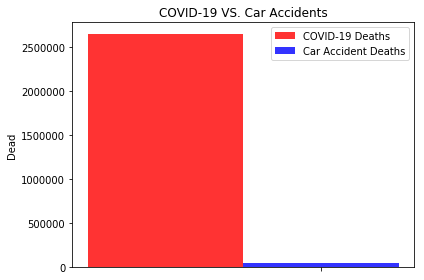

In [36]:
Ngroup=1
DeadFromCovid=(2648700)
WW2=(38800)
fig, ax = plt.subplots()
index = np.arange(Ngroup)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, DeadFromCovid, bar_width,
alpha=opacity,
color='r',
label='COVID-19 Deaths')

rects2 = plt.bar(index + bar_width, WW2, bar_width,
alpha=opacity,
color='B',
label='Car Accident Deaths')

plt.xlabel('')
plt.ylabel('Dead')
plt.title('COVID-19 VS. Car Accidents')
plt.xticks(index + bar_width,'')
plt.legend()

plt.tight_layout()
plt.show()

### It would also be a little under __77.4x__ the amount of people that died in 2019 due to the influenza which was ~34200
source:*https://www.cdc.gov/flu/about/burden/2018-2019.html.*

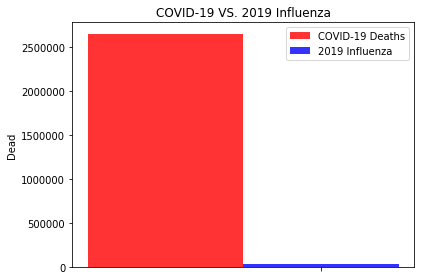

In [37]:
Ngroup=1
DeadFromCovid=(2648700)
WW2=(34200)
fig, ax = plt.subplots()
index = np.arange(Ngroup)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, DeadFromCovid, bar_width,
alpha=opacity,
color='r',
label='COVID-19 Deaths')

rects2 = plt.bar(index + bar_width, WW2, bar_width,
alpha=opacity,
color='B',
label='2019 Influenza')

plt.xlabel('')
plt.ylabel('Dead')
plt.title('COVID-19 VS. 2019 Influenza')
plt.xticks(index + bar_width,'')
plt.legend()

plt.tight_layout()
plt.show()

# 2016 World Census information:
"Lower fertility and increased longevity have led to the
rapid growth of the older population across the world
and in the United States. In 2015, among the 7.3 billion
people estimated worldwide, 617.1 million (9 percent)
were aged 65 and older. By 2030, the older population will be about 1 billion (12 percent of the projected
total world population) and by 2050, 1.6 billion (17
percent) of the total population of 9.4 billion will be
65 and older."(*https://www.census.gov/library/publications/2018/acs/acs-38.html*)

### If the trend has continued that means that 700+ million people 65+ worldwide are put in danger due to COVID-19

# 2016 US census information: 
The 2016 ACS estimated the number of people in the United States
aged 65 and over as 49.2 million.
Of them, more than half (28.75 million or 58 percent) were aged
65 to 74.
The 75 to 84 age group share of the older population was around 14.3 million or 29 percent—more than double the number and proportion (6.3 million or 13 percent) for those 85 and older
### If the trend has continued that means that 55+ million people 65+ domestically are put in danger due to COVID-19

# You're young why should it matter that old people are the most in danger?
![Person With Mask Thinking](img/WidePeepoThink.jpeg)

A 2019 report from the executive-staffing firm Crist Kolder Associates said CEOs' average age at the time of hiring for Fortune 500 and S&P 500 companies rose sharply to 57 years old from 54 between 2018 and 2019. 
### The most common age for a CEO to be hired at is 57 years old, the report said.
### Half of all CEOs are between 54 and 61 years old
*2019 Fortune 500 and S&P 500 (670 Companies; 677 Sitting CEOs; 672 Known CEO Ages)http://www.cristkolder.com/volatility-report/*

![Graph Showing Average CEO Age](img/CEOAge.png)

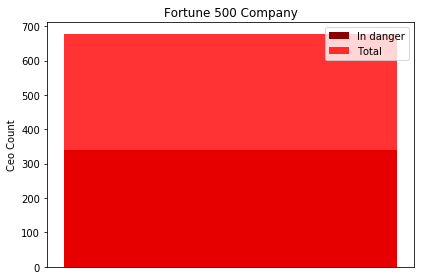

In [38]:
Ngroup=1
InDanger=(338.5)
Total=(677)
fig, ax = plt.subplots()
index = np.arange(Ngroup)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, InDanger, bar_width,
alpha=1,
color='darkred',
label='In danger')

rects2 = plt.bar(index, Total, bar_width,
alpha=opacity,
color='r',
label='Total')

plt.xlabel('')
plt.ylabel('Ceo Count')
plt.title('Fortune 500 Company')
plt.xticks(index + bar_width,'')
plt.legend()

plt.tight_layout()
plt.show()

Taking this data into account and applying the 1% mortality rule that mean's that __67 fortune 500 companies _minimum_ that will lose their CEO to COVID-19__ plus many other manager/senior level employees who could be essential to the company. 

## Taking into consideration that in total, Fortune 500 companies represent two-thirds of the U.S. GDP with 13.7 trillion  in revenues, 1.1 trillion in profits, 22.6 trillion in market value, and the employment of 28.7 million people worldwide. 

# __Losing any kind of medium-longstanding functionallity in just 10% of those Fortune 500 businesses would be disasterous to the economy__
*(https://fortune.com/fortune500/)*

Also taking into account that the national average head of household age of a small-business owner is 50.3 years old, 10% of that secor being affected would further curtail a recession. *https://www.experian.com/whitepapers/BOLStudy_Experian.pdf*

![Small Business Owner](img/SmallBusinessOwner.jpeg)

# American Economy


*https://www.financialsamurai.com/what-percent-of-americans-own-stocks/*
![Earnings by Age](img/IncomeByAge.png)
Nick Routley according to visualcapitalist.com data from IPUMS.org income is positively coorelated with age. only a tiny percentage of workers under 25 make more than 50k, earning levels at 35 and peaks in between 65 and 70. 


Average net worth ranges from __93,982.80 thousand for 18-24 year olds__ all the way up to __1,180,377.62 million for 60-64 year olds__. 
### This table lists the average and median net worth for all the ages in the United States:
![Networth to Age](img/NetworthAge.png)

At first glance it might look like the yellow bars which show the averages (yellow) bars of people's net worth not being too bad, on average 18-24 year olds are worth 93 thousand? SIGN ME UP! But the story changes when we look at the median net worth(blue). This bar show what the person in the middle of the pack is making. That means that half of the people 19-24 are have a net worth of less than 4.3 thousand and a majority of people are still not making anything close to 93 million, the top earners in the category just skew the average data.

## On the other hand...
When people reach the age of 44-50 which is danger territory for COVID-19 their net worth starts getting into the 100's of thousands even by the median net worth half of the people in the age group are worth 100 thousand or more, showing the reality of where America's wealth is held

In [39]:
NetWorthChart=pd.read_csv('NetWorthChart.csv')
NetWorthChart

,Age Average,Net Worth,Median Net Worth
0,18-24,"$93,982.80","$4,394.53"
1,25-29,"$39,565.88","$8,971.58"
2,30-34,"$95,235.53","$29,125.08"
3,35-39,"$257,581.86","$40,666.52"
4,40-44,"$316,660.61","$87,842.71"
5,45-49,"$599,194.17","$105,717.43"
6,50-54,"$838,702.95","$137,866.81"
7,55-59,"$1,150,037.78","$168,044.19"
8,60-64,"$1,180,377.62","$224,775.17"
9,65-69,"$1,056,483.97","$209,575.26"


*https://dqydj.com/net-worth-by-age-calculator-united-states/*

![Stock Market Crash](img/MarketCrash.jpeg)

*"The market wont affect us, right?"*


<h2 style="color:red">This mean that COVID-19 effectively predominately targets, and has the possibility of crippling the largest consumer economy in the nation.</h2> 

What this graph does is it essentially shows who is most likely to own the majority of stock in the country. And you guessed it, its the the elder demographic of people.

As of 2019, the top 10% of Americans owned an average of 969,000 dollars in stocks. 
The next 40% owned 132,000 on average. 
For the bottom half of families, it was just under 54,000.

This would effectively, at the very least sink the stock market and at the very worst crash it. Though the average American generally is not affected by dips and and highs of a healthy market, they will surely be affected by a sink and crash the size of what COVID can cause. It could cause massive job lose as well as temporary and permanate country-wide business closing of businesses. The first to go would be novelty stores, then it's a horse race to which business will be affected next as, most likely, only the most prepared and essential businesses would be standing.
(*Net Worth by Age Calculator for the United States
Economics    Written by: PKAdvertising Disclosures*)

# American Politics
The average age of Members of the House at the beginning of the 115th Congress was 57.8 years; of Senators, 61.8 years, among the oldest in U.S. history. (*https://www.senate.gov/CRSpubs/b8f6293e-c235-40fd-b895-6474d0f8e809.pdf*

According to Quorum.us:
1. 48 Senators are over the age of 65
2. 147 Represenatives are over the age of 65
3. 15 governors are over the age of 65
4. More than half of the Senators up for reelection in 2020 are over 65(21)
(*https://www.quorum.us/data-driven-insights/the-115th-congress-is-among-the-oldest-in-history/175/*)
## What does this mean?
As Congress isnt able to work from home because all voting must be done in person they are among some of the most at risk people throughout the pandemic. If washington does not take all of the required precautions to safeguard the safety of congress it could spell disaster for the United States government. If congressmen and women start getting getting infected without cure for COVID-19 it will be a COVID-roulette of who get's fatally affected by the virus. Either party could lose the majority in their respective house if enough people are affected. Policies will not be able to go into affect and the president would most likely have to execute a __state of emergency and enact executive privilege__, the only problem with that being that
# The president AND vice-president are both in the age ranges to be most affected fatally by the virus
even if you do not like who the current president and vice president are in the absolute worst case scenario this would surely result in immense negative consequences for the nation locally and it would be wishful thinking that other governments will not try to take advantage and at that point all bets are off.

# In conclusion:
### Best case scenario
The nation and most (all is just VERY far fetched and due to our type of government not a possibility) will have to band together to quarantine ourselves and our loved ones. Everyone must have their minds wrapped around how and what they can do to best stop the spread of the virus. We will have to follow the most if not all of the Intervention steps below:

![Intervention Effect Graph](img/Interventions.png)

The best thing people can do is to not freak out and to follow safety precautions as best as they can and the spread is guaranteed to be reduced. According to Imperial College following these "Interventions" or containment procedures would help to reduce the the spread of COVID-19 as detailed below: 
![List of Interventions People Can Do](img/InterventionEffects.png)

source:*https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-NPI-modelling-16-03-2020.pdf*
### Worst Case Scenario
If the nation and the world is not able to unite cohesively then it will spell certain economic, political and humanitarian disaster. Economies will be broken, millions will die and the political landscape will change drastically locally as well as world round. Many will become sick then die and more will be left homeless and without help for a time.
### Fortunately
Many, if not most, countries have begun taking action to try and limit the spread of the virus as much as possible. Quarantines have been imposed, non essential retail have been closed and events that would hold large gatherings of people have been postponed or cancelled worldwide (though there have been issues with people following containment procedures). The United States is even considering an emergency UBI measure to try and alleviate the economic strain already being felt by many in the country. Though things can look bleak at times and many of us are surely to fall on hard times for a period it is imperative that calm be kept. It is not the end of the world as we know it so stop buying all of the TP.